In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
import seaborn as sb

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [27]:
# read the dataset
df = pd.read_csv("historical_sectors.csv", low_memory=False)

df.head(5027)

DATE  XLE_CLOSE   XLE_VOL  XLE_SMA_200  XLE_EMA_100  XLE_MACD  \
0      1/3/2006    31.9065  24190200      28.2759      29.9028    0.1311   
1      1/4/2006    31.9973  19997900      28.3056      29.9443    0.2062   
2      1/5/2006    31.5916  23561000      28.3349      29.9769    0.2304   
3      1/6/2006    32.3666  18145900      28.3705      30.0242    0.3085   
4      1/9/2006    32.3302  15235200      28.4060      30.0699    0.3633   
...         ...        ...       ...          ...          ...       ...   
4336  3/27/2023    78.8554  20111900      79.9468      82.6998   -1.9117   
4337  3/28/2023    80.0747  16298400      79.9186      82.6478   -1.6587   
4338  3/29/2023    81.1849  18102300      79.9032      82.6188   -1.3530   
4339  3/30/2023    81.5418  13730400      79.9115      82.5975   -1.0697   
4340  3/31/2023    82.1068  16147300      79.9220      82.5878   -0.7904   

      XLE_RSI   XLE_CCI  XLE_STOCH  XLE_LBB  XLE_MBB  XLE_UBB  XLB_CLOSE  \
0     60.2638   69.0318    43.9043  29.4094  30.6762  31.9430     20.967   
1     60.9163  122.0506    70.3419  29.5759  31.0528  32.5297     21.096   
2     56.4563   96.3993    88.0642  29.8227  31.2574  32.6921     21.062   
3     62.1567  170.0392    90.1963  30.3621  31.6643  32.9665     21.286   
4     61.7485  139.5576    88.8662  31.4646  32.0384  32.6123     21.279   
...       ...       ...        ...      ...      ...      ...        ...   
4336  44.6214   -8.2366    32.8621  76.0724  78.1318  80.1912     77.002   
4337  48.2975   42.2167    43.0645  75.9071  78.2091  80.5112     77.371   
4338  51.4573  104.3136    59.3835  75.5739  78.8475  82.1211     78.445   
4339  52.4629  129.1317    75.9825  76.5954  79.7734  82.9513     78.983   
4340  54.0849  125.5035    90.1693  78.4372  80.7527  83.0683     80.266   

      XLB_VOL  XLB_SMA_200  XLB_EMA_100  XLB_MACD  XLB_RSI   XLB_CCI  \
0     5604600      18.9954      19.3955    0.2820  68.1249  114.6575   
1     3107500      18.9989      19.4292    0.3034  70.1091  155.2785   
2     1685500      19.0025      19.4615    0.3139  68.8936  132.4426   
3      835300      19.0082      19.4976    0.3365  72.3060  164.3609   
4      883800      19.0139      19.5329    0.3498  72.0481  142.3213   
...       ...          ...          ...       ...      ...       ...   
4336  5307000      76.3305      78.8025   -1.2988  44.4489    1.0773   
4337  5124000      76.3078      78.7742   -1.1743  46.0487   38.1068   
4338  4135100      76.3031      78.7676   -0.9777  50.5274  134.9868   
4339  4216700      76.3165      78.7719   -0.7697  52.6442  164.2440   
4340  6763100      76.3393      78.8015   -0.4955  57.3400  170.5780   

      XLB_STOCH  XLB_LBB  XLB_MBB  XLB_UBB  XLP_CLOSE   XLP_VOL  XLP_SMA_200  \
0       77.7342  20.3957  20.7040  21.0122    14.8191   1372800      14.5125   
1       80.1300  20.4121  20.8098  21.2074    14.8697   1124300      14.5155   
2       86.8942  20.4385  20.8735  21.3085    14.7938   1806300      14.5185   
3       92.8006  20.4882  20.9888  21.4893    14.8570   1131600      14.5214   
4       95.9901  20.8874  21.1380  21.3885    14.9266   1714100      14.5247   
...         ...      ...      ...      ...        ...       ...          ...   
4336    24.7273  75.3290  76.4888  77.6487    72.8432  10865500      71.5505   
4337    29.4339  75.2968  76.5068  77.7167    72.9723  11593400      71.5659   
4338    40.7780  75.2387  77.0143  78.7899    73.3794   9483400      71.5849   
4339    55.9338  75.7749  77.6472  79.5194    73.5879  10737800      71.6124   
4340    74.4116  76.0747  78.4134  80.7521    74.1837  10338700      71.6469   

      XLP_EMA_100  XLP_MACD  XLP_RSI   XLP_CCI  XLP_STOCH  XLP_LBB  XLP_MBB  \
0         14.6526    0.0286  48.9305 -132.6855    24.1376  14.7160  14.8267   
1         14.6569    0.0267  52.0957  -61.7689    26.7028  14.7155  14.8279   
2         14.6596    0.0188  47.3547  -76.0728    34.1668  14.7105  14.8102   
3         14.6635    0.0174  51.3296  -63.9

In [28]:
df.dropna(axis=0, inplace=True)

df.head(4417)

DATE  XLE_CLOSE   XLE_VOL  XLE_SMA_200  XLE_EMA_100  XLE_MACD  \
0      1/3/2006    31.9065  24190200      28.2759      29.9028    0.1311   
1      1/4/2006    31.9973  19997900      28.3056      29.9443    0.2062   
2      1/5/2006    31.5916  23561000      28.3349      29.9769    0.2304   
3      1/6/2006    32.3666  18145900      28.3705      30.0242    0.3085   
4      1/9/2006    32.3302  15235200      28.4060      30.0699    0.3633   
...         ...        ...       ...          ...          ...       ...   
4336  3/27/2023    78.8554  20111900      79.9468      82.6998   -1.9117   
4337  3/28/2023    80.0747  16298400      79.9186      82.6478   -1.6587   
4338  3/29/2023    81.1849  18102300      79.9032      82.6188   -1.3530   
4339  3/30/2023    81.5418  13730400      79.9115      82.5975   -1.0697   
4340  3/31/2023    82.1068  16147300      79.9220      82.5878   -0.7904   

      XLE_RSI   XLE_CCI  XLE_STOCH  XLE_LBB  XLE_MBB  XLE_UBB  XLB_CLOSE  \
0     60.2638   69.0318    43.9043  29.4094  30.6762  31.9430     20.967   
1     60.9163  122.0506    70.3419  29.5759  31.0528  32.5297     21.096   
2     56.4563   96.3993    88.0642  29.8227  31.2574  32.6921     21.062   
3     62.1567  170.0392    90.1963  30.3621  31.6643  32.9665     21.286   
4     61.7485  139.5576    88.8662  31.4646  32.0384  32.6123     21.279   
...       ...       ...        ...      ...      ...      ...        ...   
4336  44.6214   -8.2366    32.8621  76.0724  78.1318  80.1912     77.002   
4337  48.2975   42.2167    43.0645  75.9071  78.2091  80.5112     77.371   
4338  51.4573  104.3136    59.3835  75.5739  78.8475  82.1211     78.445   
4339  52.4629  129.1317    75.9825  76.5954  79.7734  82.9513     78.983   
4340  54.0849  125.5035    90.1693  78.4372  80.7527  83.0683     80.266   

      XLB_VOL  XLB_SMA_200  XLB_EMA_100  XLB_MACD  XLB_RSI   XLB_CCI  \
0     5604600      18.9954      19.3955    0.2820  68.1249  114.6575   
1     3107500      18.9989      19.4292    0.3034  70.1091  155.2785   
2     1685500      19.0025      19.4615    0.3139  68.8936  132.4426   
3      835300      19.0082      19.4976    0.3365  72.3060  164.3609   
4      883800      19.0139      19.5329    0.3498  72.0481  142.3213   
...       ...          ...          ...       ...      ...       ...   
4336  5307000      76.3305      78.8025   -1.2988  44.4489    1.0773   
4337  5124000      76.3078      78.7742   -1.1743  46.0487   38.1068   
4338  4135100      76.3031      78.7676   -0.9777  50.5274  134.9868   
4339  4216700      76.3165      78.7719   -0.7697  52.6442  164.2440   
4340  6763100      76.3393      78.8015   -0.4955  57.3400  170.5780   

      XLB_STOCH  XLB_LBB  XLB_MBB  XLB_UBB  XLP_CLOSE   XLP_VOL  XLP_SMA_200  \
0       77.7342  20.3957  20.7040  21.0122    14.8191   1372800      14.5125   
1       80.1300  20.4121  20.8098  21.2074    14.8697   1124300      14.5155   
2       86.8942  20.4385  20.8735  21.3085    14.7938   1806300      14.5185   
3       92.8006  20.4882  20.9888  21.4893    14.8570   1131600      14.5214   
4       95.9901  20.8874  21.1380  21.3885    14.9266   1714100      14.5247   
...         ...      ...      ...      ...        ...       ...          ...   
4336    24.7273  75.3290  76.4888  77.6487    72.8432  10865500      71.5505   
4337    29.4339  75.2968  76.5068  77.7167    72.9723  11593400      71.5659   
4338    40.7780  75.2387  77.0143  78.7899    73.3794   9483400      71.5849   
4339    55.9338  75.7749  77.6472  79.5194    73.5879  10737800      71.6124   
4340    74.4116  76.0747  78.4134  80.7521    74.1837  10338700      71.6469   

      XLP_EMA_100  XLP_MACD  XLP_RSI   XLP_CCI  XLP_STOCH  XLP_LBB  XLP_MBB  \
0         14.6526    0.0286  48.9305 -132.6855    24.1376  14.7160  14.8267   
1         14.6569    0.0267  52.0957  -61.7689    26.7028  14.7155  14.8279   
2         14.6596    0.0188  47.3547  -76.0728    34.1668  14.7105  14.8102   
3         14.6635    0.0174  51.3296  -63.9

In [29]:
print(df.shape)

(4341, 143)


In [30]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

print(df.shape)

(4341, 142)


In [31]:
print(df.dtypes)

XLE_CLOSE      float64
XLE_VOL          int64
XLE_SMA_200    float64
XLE_EMA_100    float64
XLE_MACD       float64
                ...   
TB3SMFFM       float64
T10YIEM        float64
EXPINF2YR      float64
CSUSHPINSA     float64
UMCSENT        float64
Length: 142, dtype: object


In [32]:
print(df.describe())

         XLE_CLOSE       XLE_VOL  XLE_SMA_200  XLE_EMA_100     XLE_MACD  \
count  4341.000000  4.341000e+03  4341.000000  4341.000000  4341.000000   
mean     48.249780  2.111191e+07    47.029659    47.648557     0.081780   
std      12.301691  1.172951e+07    10.475712    11.200541     0.923272   
min      20.209800  2.795300e+06    28.275900    29.338800    -6.109000   
25%      38.875000  1.266330e+07    38.042100    37.655100    -0.416900   
50%      48.385200  1.833340e+07    47.119600    47.946600     0.188300   
75%      53.781300  2.632400e+07    52.531600    53.256000     0.619900   
max      91.354400  9.935670e+07    80.291700    84.140400     3.310900   

           XLE_RSI      XLE_CCI    XLE_STOCH      XLE_LBB      XLE_MBB  \
count  4341.000000  4341.000000  4341.000000  4341.000000  4341.000000   
mean     52.105243    10.502915    55.964822    46.992134    48.226218   
std      11.703105   107.144802    28.570547    12.129263    12.263500   
min      14.678400  -330.536

## I. Pearson's Coefficient

In [33]:
pearson_cff = df.corr(method='pearson')
pearson_cff

XLE_CLOSE   XLE_VOL  XLE_SMA_200  XLE_EMA_100  XLE_MACD  \
XLE_CLOSE     1.000000 -0.216212     0.859698     0.949064  0.261162   
XLE_VOL      -0.216212  1.000000    -0.139455    -0.152912 -0.212422   
XLE_SMA_200   0.859698 -0.139455     1.000000     0.962234 -0.104467   
XLE_EMA_100   0.949064 -0.152912     0.962234     1.000000 -0.019939   
XLE_MACD      0.261162 -0.212422    -0.104467    -0.019939  1.000000   
...                ...       ...          ...          ...       ...   
TB3SMFFM      0.323931 -0.016174     0.327290     0.322073  0.076957   
T10YIEM       0.360049 -0.143624    -0.033981     0.179039  0.371711   
EXPINF2YR     0.327431  0.060656     0.069171     0.229523  0.169066   
CSUSHPINSA    0.464771  0.271027     0.356436     0.426577  0.128346   
UMCSENT      -0.025911 -0.360673     0.065660     0.012507 -0.064663   

              XLE_RSI   XLE_CCI  XLE_STOCH   XLE_LBB   XLE_MBB   XLE_UBB  \
XLE_CLOSE    0.152907  0.067766   0.091179  0.995502  0.997192  0.993998   
XLE_VOL     -0.240485 -0.180678  -0.187495 -0.249465 -0.204447 -0.159625   
XLE_SMA_200 -0.138174 -0.094608  -0.099651  0.856389  0.865512  0.870195   
XLE_EMA_100 -0.085152 -0.082673  -0.077788  0.946517  0.954846  0.958321   
XLE_MACD     0.757048  0.423387   0.564068  0.266115  0.246793  0.226784   
...               ...       ...        ...       ...       ...       ...   
TB3SMFFM     0.023869  0.001165  -0.010310  0.316437  0.322053  0.325957   
T10YIEM      0.258967  0.112174   0.151780  0.365599  0.354931  0.342822   
EXPINF2YR    0.081136  0.017511   0.024517  0.323053  0.328493  0.332195   
CSUSHPINSA   0.014383 -0.003370  -0.007594  0.441658  0.463602  0.482716   
UMCSENT     -0.066009 -0.056117  -0.068559  0.002915 -0.023721 -0.049540   

             XLB_CLOSE   XLB_VOL  XLB_SMA_200  XLB_EMA_100  XLB_MACD  \
XLE_CLOSE     0.572369 -0.182332     0.591470     0.580811  0.047208   
XLE_VOL       0.120326  0.441185     0.188638     0.171685 -0.304341   
XLE_SMA_200   0.459633 -0.129194     0.545024     0.504272 -0.149911   
XLE_EMA_100   0.525573 -0.121745     0.585942     0.561791 -0.133060   
XLE_MACD      0.183932 -0.229069     0.089488     0.107893  0.650896   
...                ...       ...          ...          ...       ...   
TB3SMFFM      0.424743 -0.130801     0.464191     0.442047 -0.006826   
T10YIEM       0.167588 -0.048581     0.088238     0.131370  0.147474   
EXPINF2YR     0.153995 -0.112486     0.152690     0.159238 -0.044099   
CSUSHPINSA    0.909474 -0.226013     0.924508     0.921984  0.033690   
UMCSENT       0.038100 -0.380344    -0.019962     0.008990  0.130947   

              XLB_RSI   XLB_CCI  XLB_STOCH   XLB_LBB   XLB_MBB   XLB_UBB  \
XLE_CLOSE    0.023349  0.007962  -0.002188  0.575801  0.572366  0.568417   
XLE_VOL     -0.375874 -0.260791  -0.244860  0.110364  0.127451  0.143824   
XLE_SMA_200 -0.145211 -0.091990  -0.115606  0.461250  0.461680  0.461587   
XLE_EMA_100 -0.136051 -0.096183  -0.116615  0.528573  0.528099  0.527060   
XLE_MACD     0.493620  0.282834   0.406433  0.188900  0.180195  0.171585   
...               ...       ...        ...       ...       ...       ...   
TB3SMFFM     0.004838  0.007718  -0.019659  0.423534  0.424405  0.424779   
T10YIEM      0.115493  0.058847   0.063366  0.172937  0.166992  0.161064   
EXPINF2YR   -0.034257 -0.023487  -0.042218  0.156837  0.156216  0.155443   
CSUSHPINSA  -0.030515  0.001918  -0.016480  0.905547  0.910231  0.913756   
UMCSENT      0.129383  0.053105   0.071987  0.049648  0.037601  0.025917   

             XLP_CLOSE   XLP_VOL  XLP_SMA_200  XLP_EMA_100  XLP_MACD  \
XLE_CLOSE     0.540592  0.256946     0.546465     0.542767  0.058314   
XLE_VOL       0.094717  0.246151     0.115904     0.112857 -0.214454   
XLE_SMA_200   0.516086  0.329614     0.536848     0.527359 -0.038011   
XLE_EMA_100   0.538171  0.320480     0.553292     0.547227 -0.027419   
XLE_MACD      0.092321 -0.128786     0.071884     0.074405  0.305288   
...                ...   

### Heatmaps

In [34]:
# strong positive correlations are dark red
# strong negative correlations are dark blue

#### 1. XLE Index Closing Price

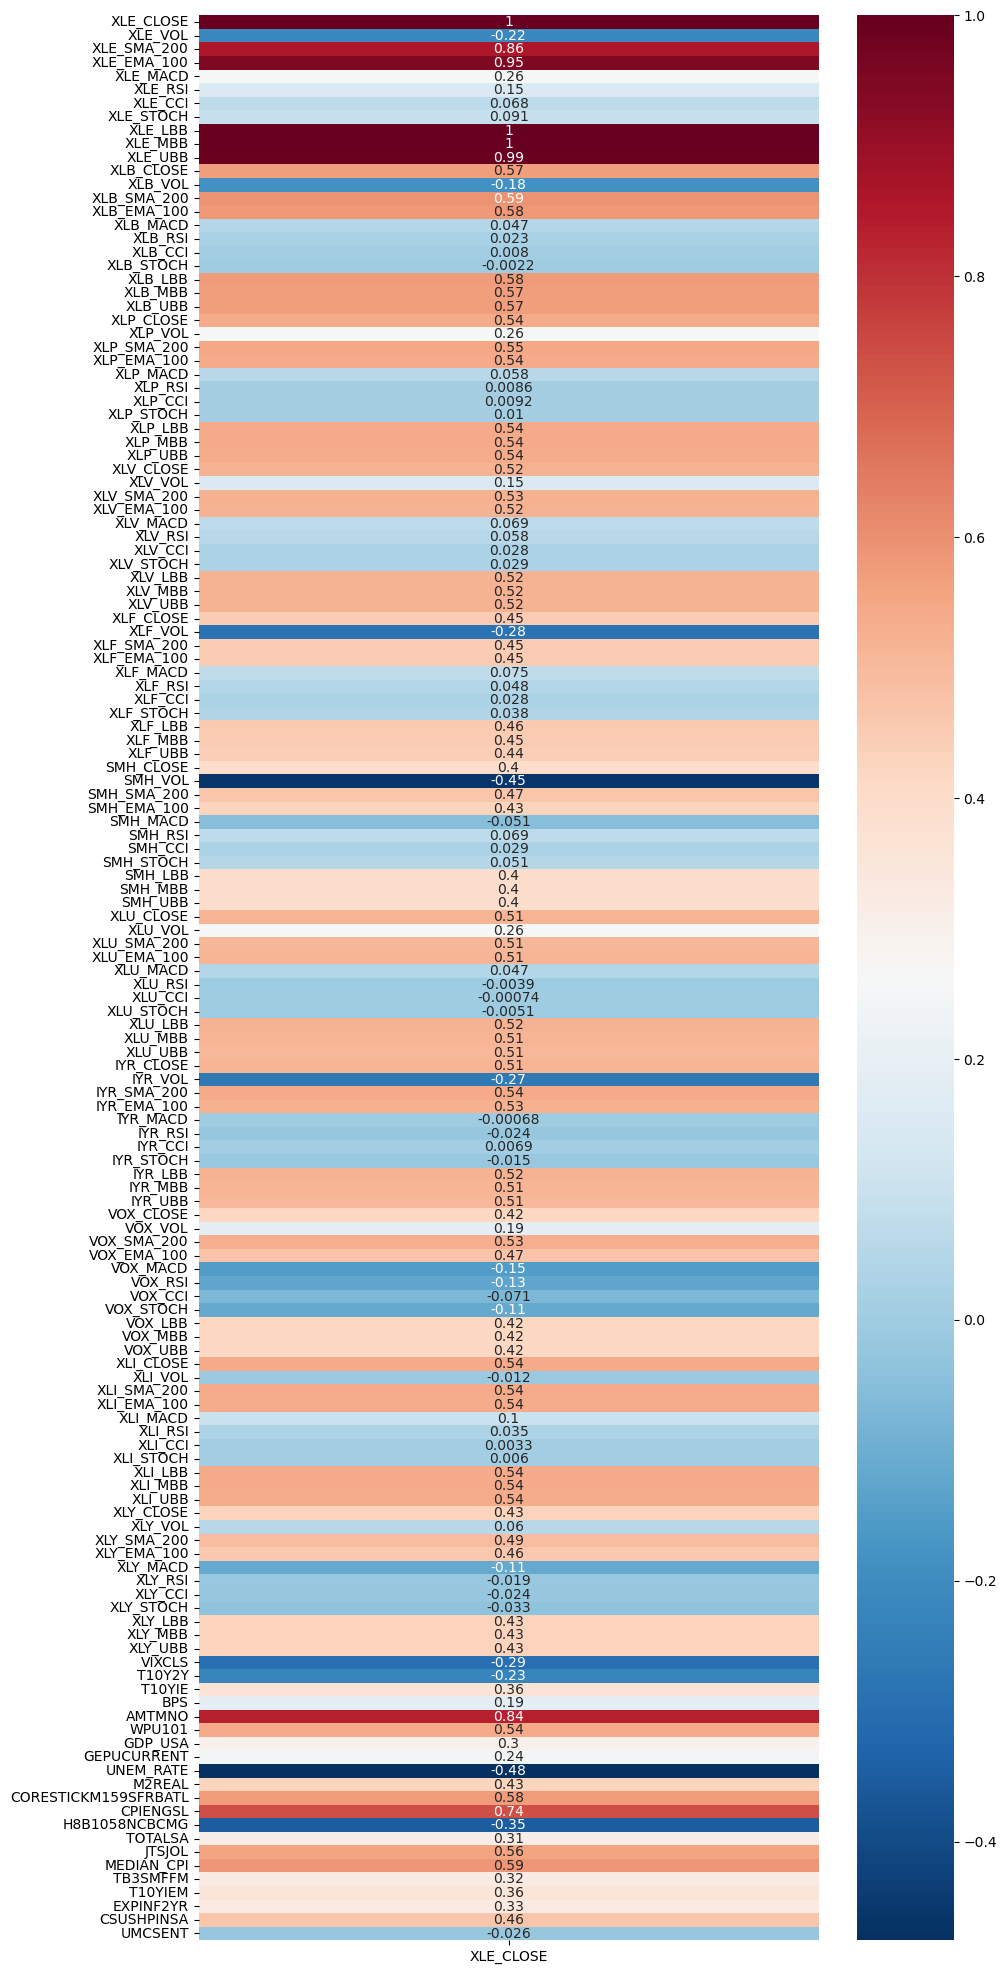

In [35]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLE_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLE_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

plt.show()

#### 2. XLB Index Closing Price

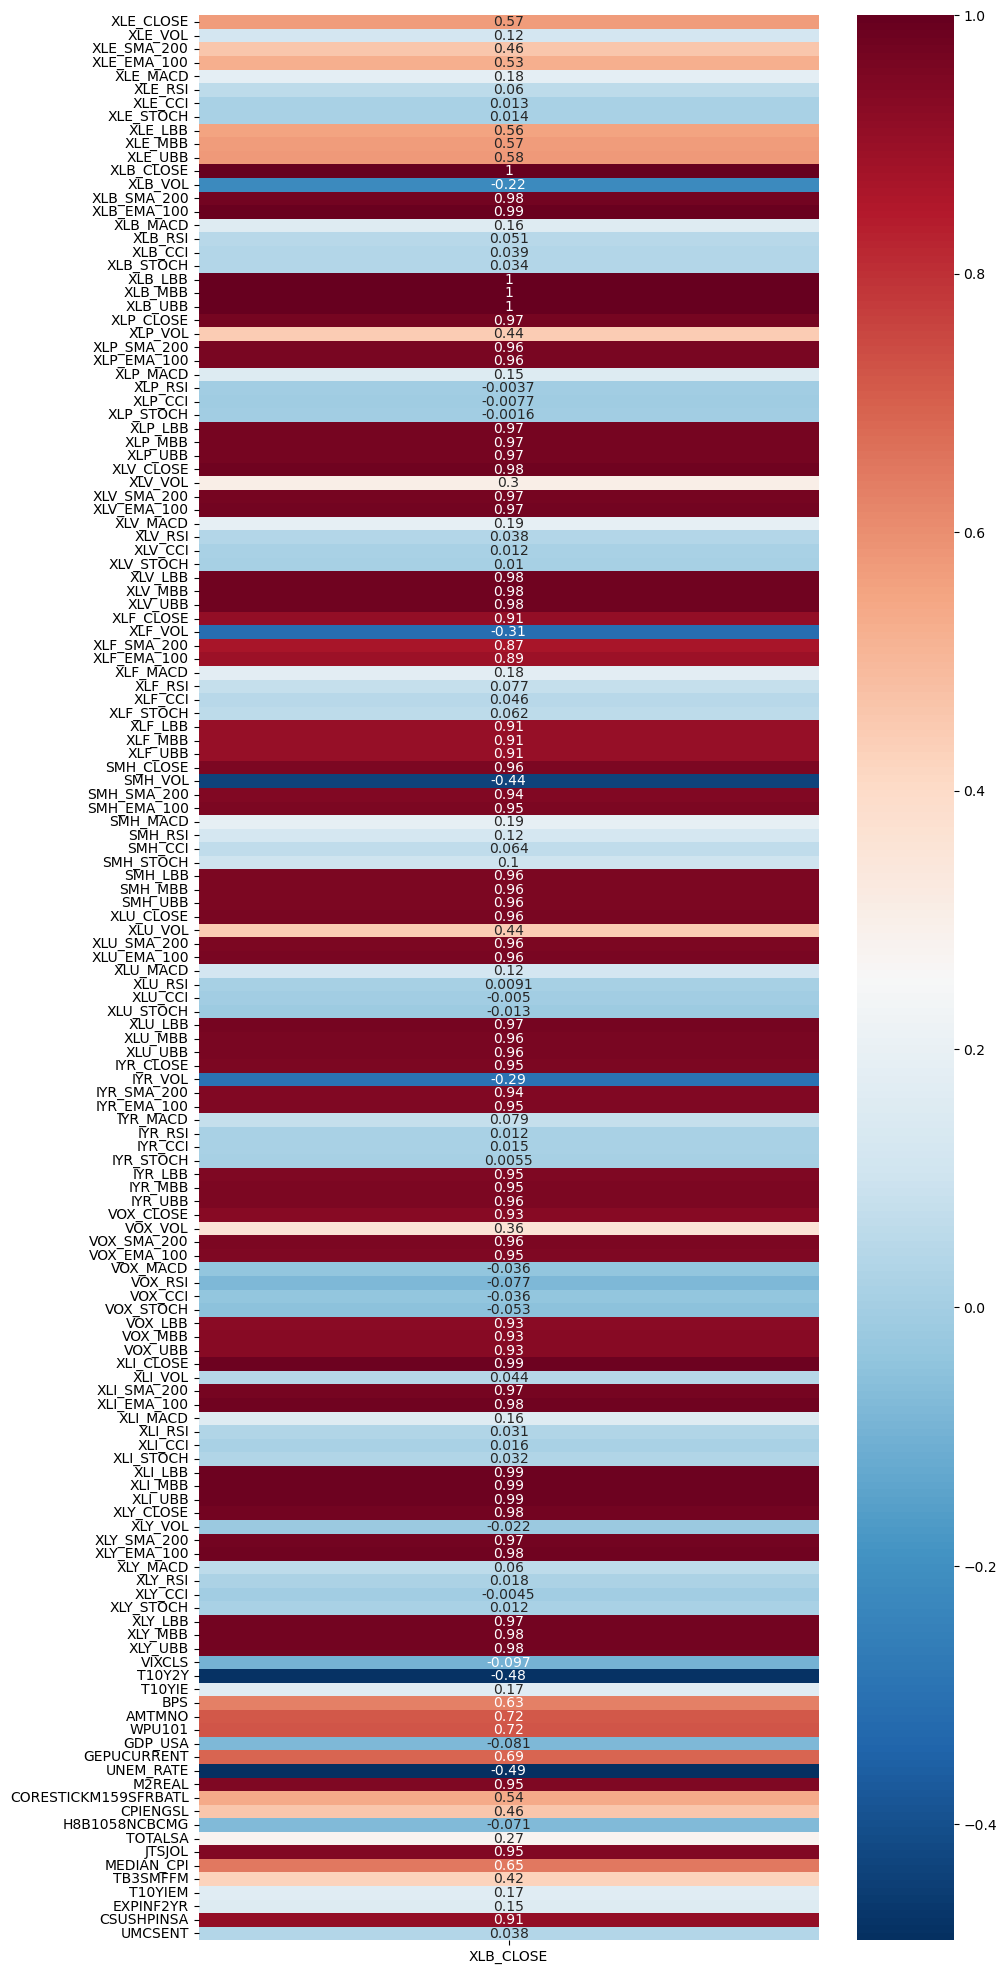

In [18]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLB_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLB_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

plt.show()

#### 3. XLP Index Closing Price

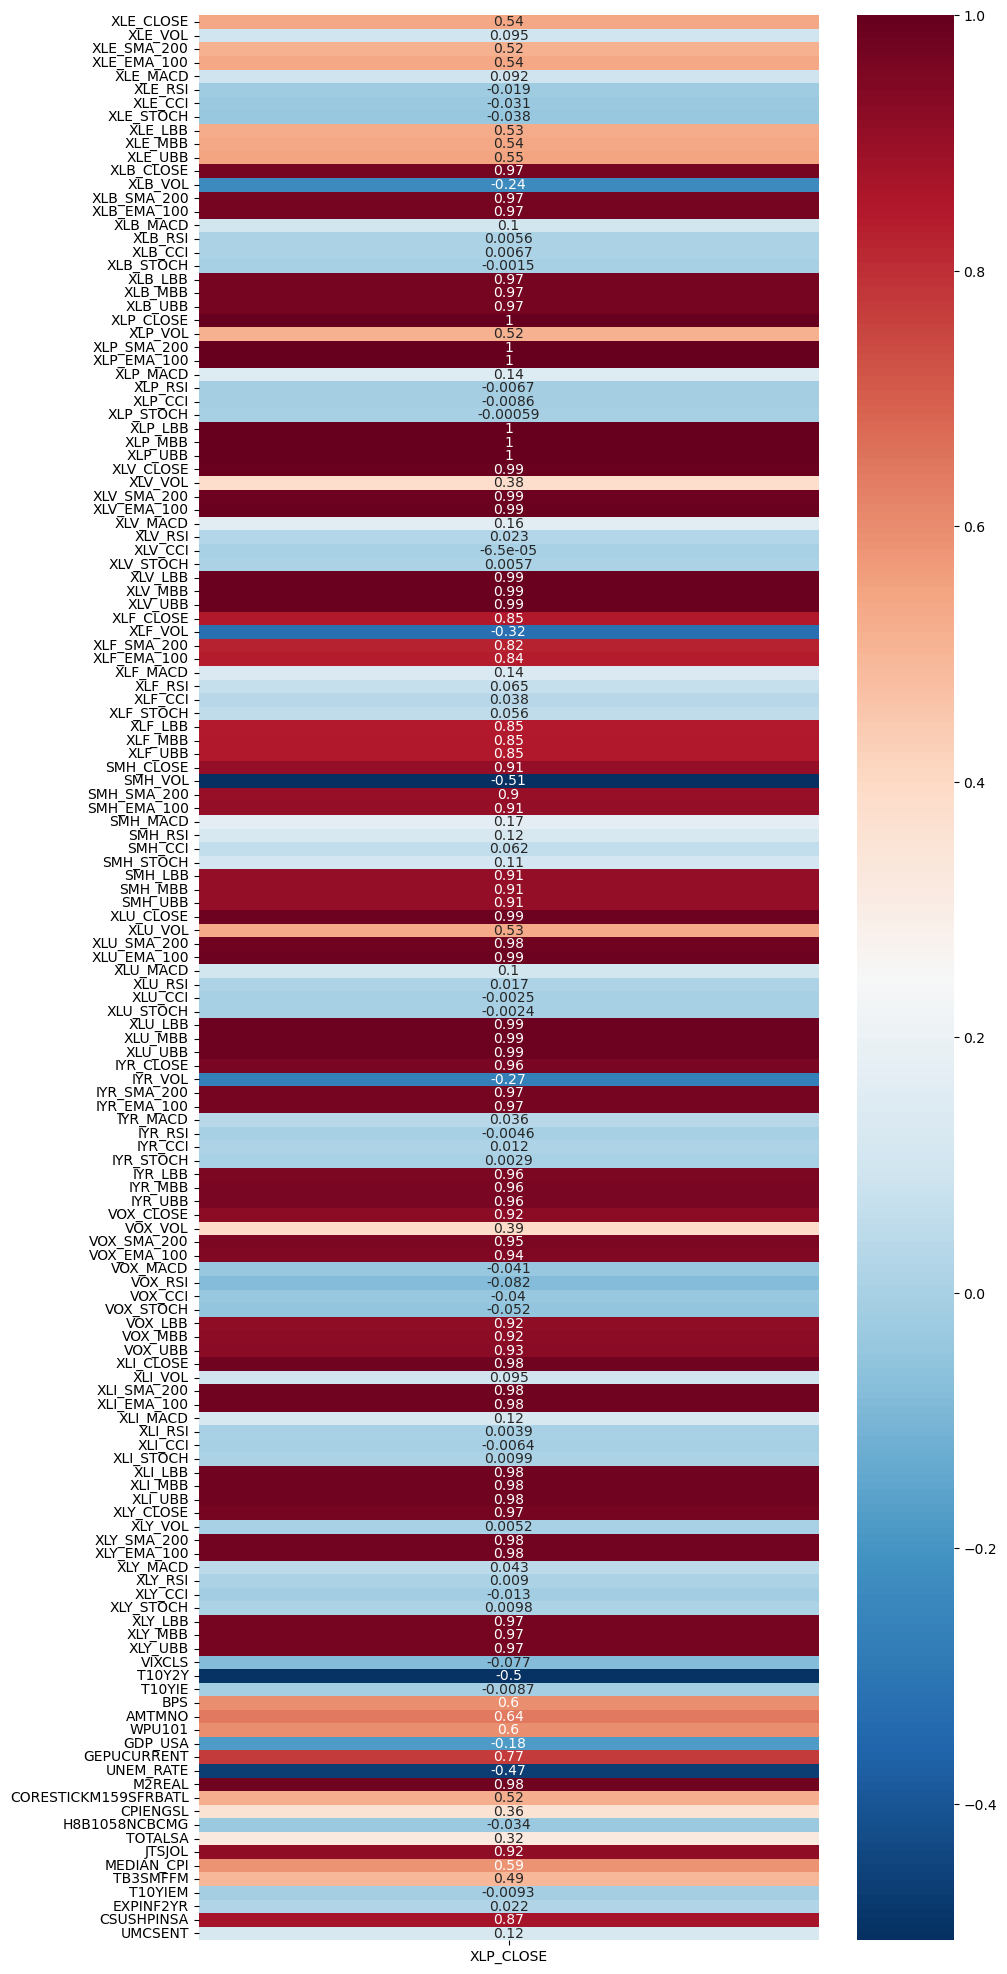

In [19]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLP_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLP_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 4. XLV Index Closing Price

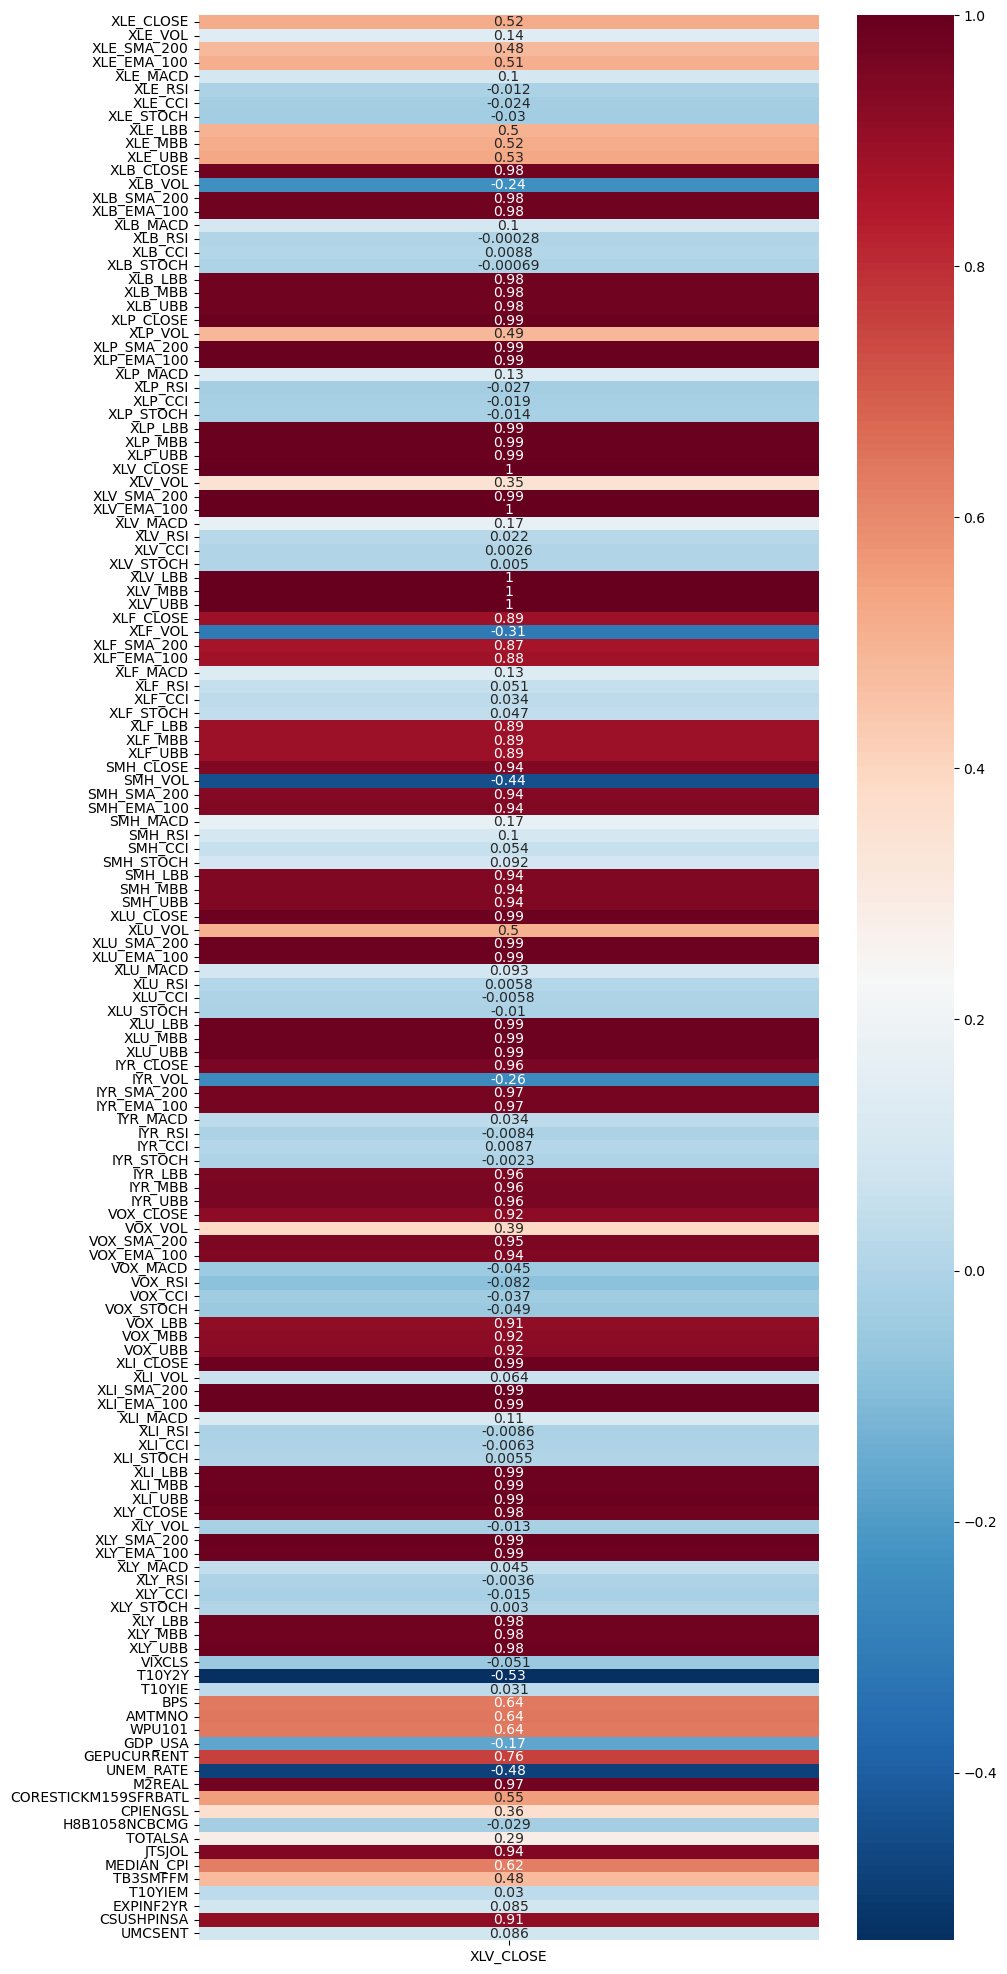

In [20]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLV_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLV_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 5. XLF Index Closing Price

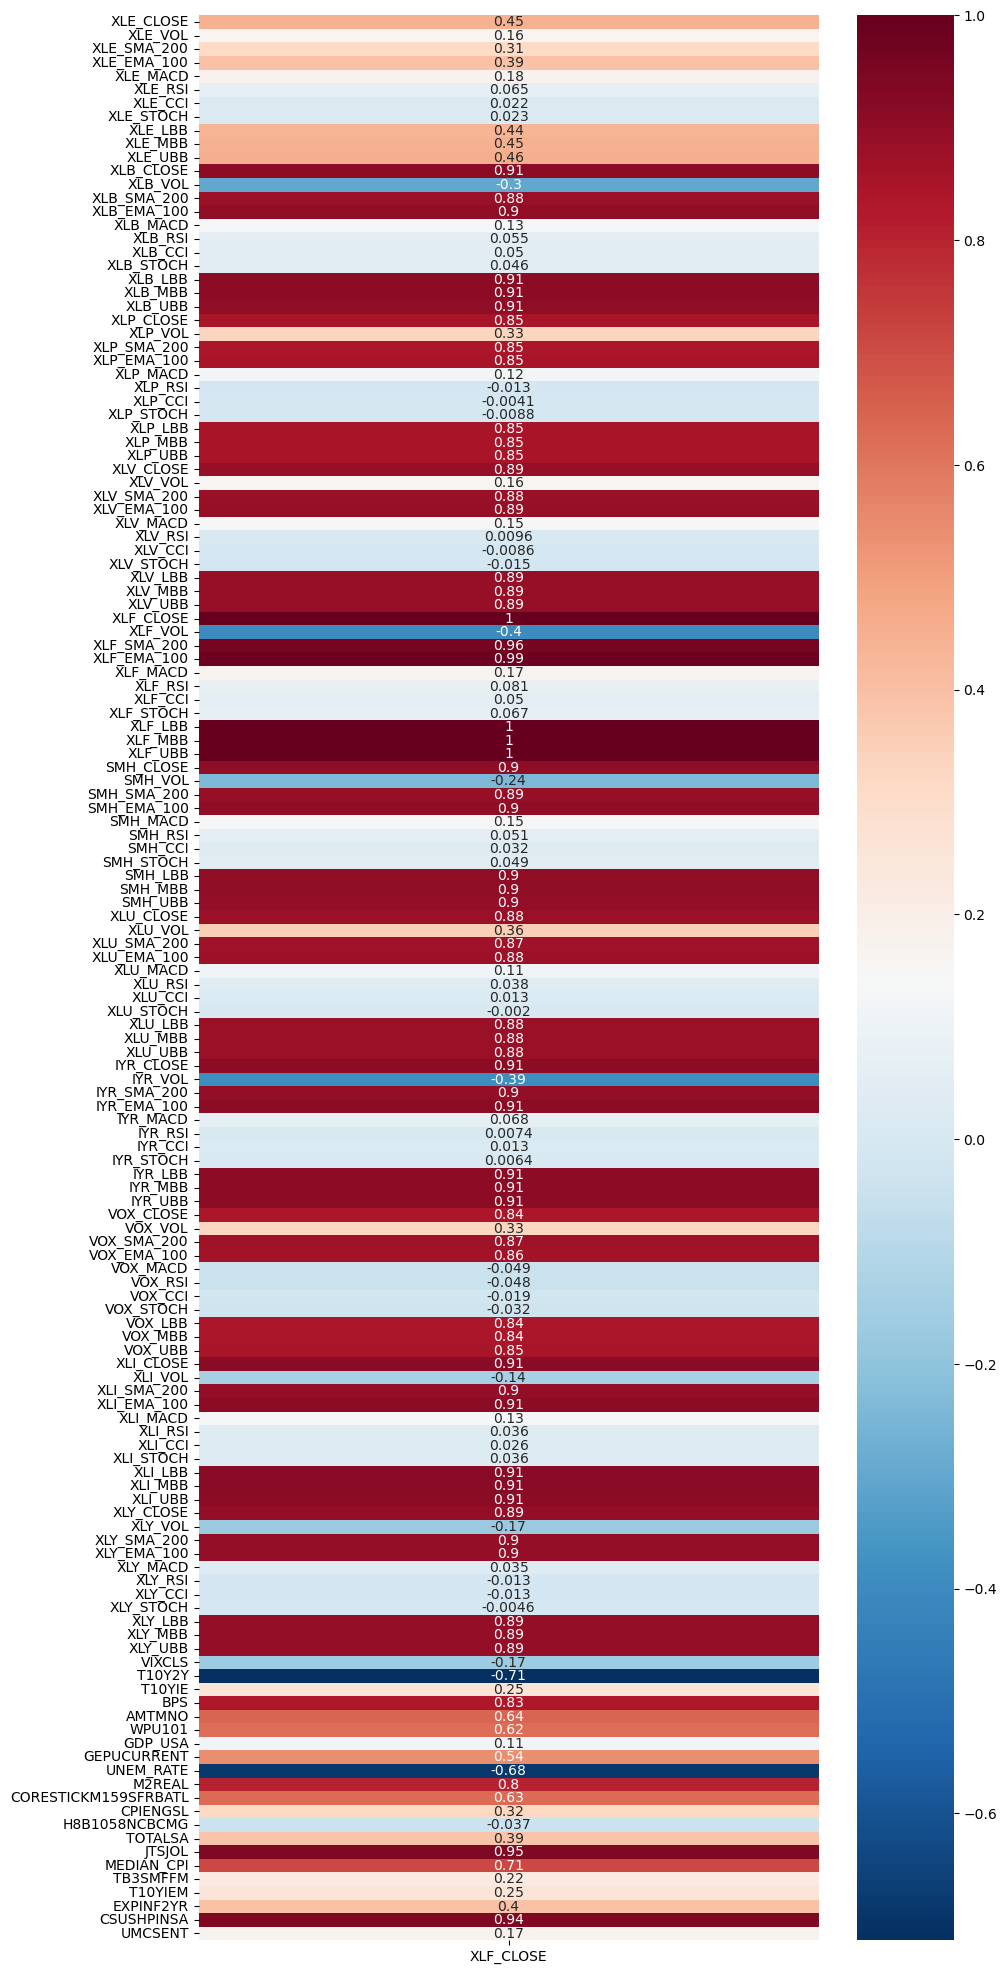

In [21]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLF_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLF_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 6. SMH Index Closing Price

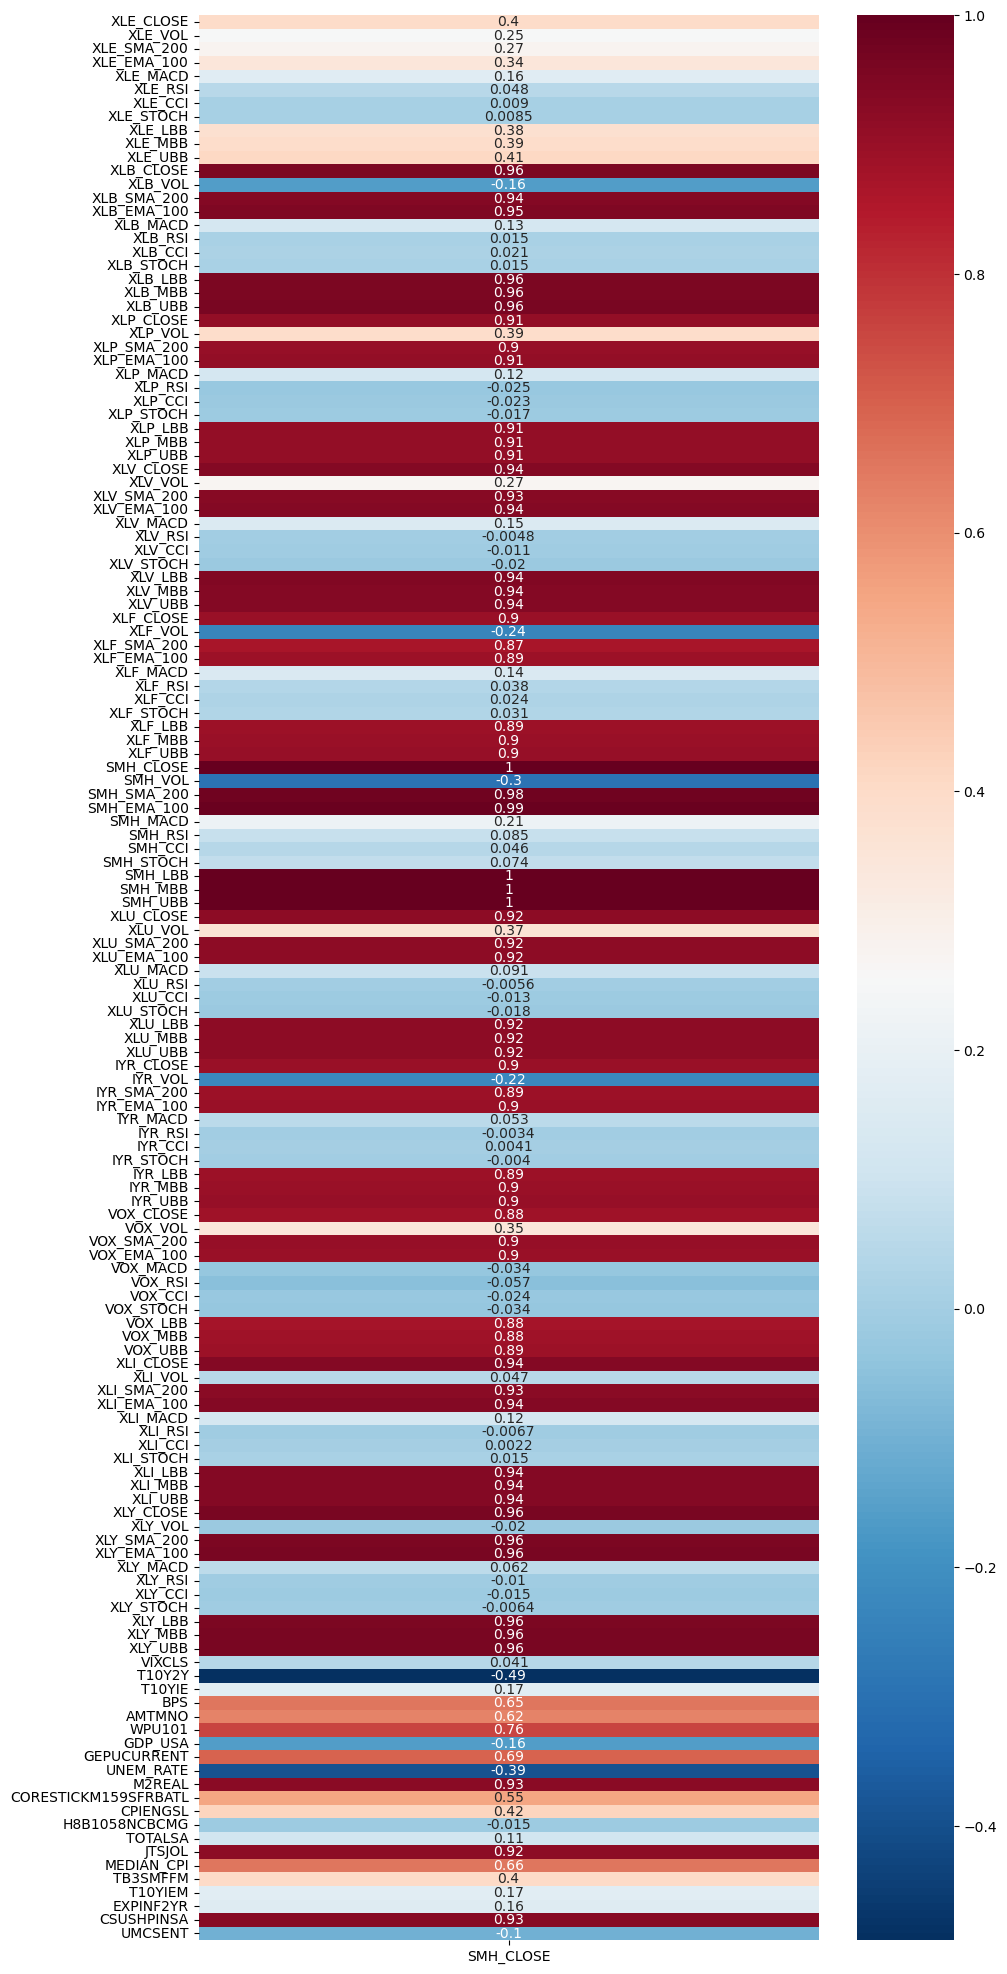

In [22]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['SMH_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['SMH_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 7. XLU Index Closing Price

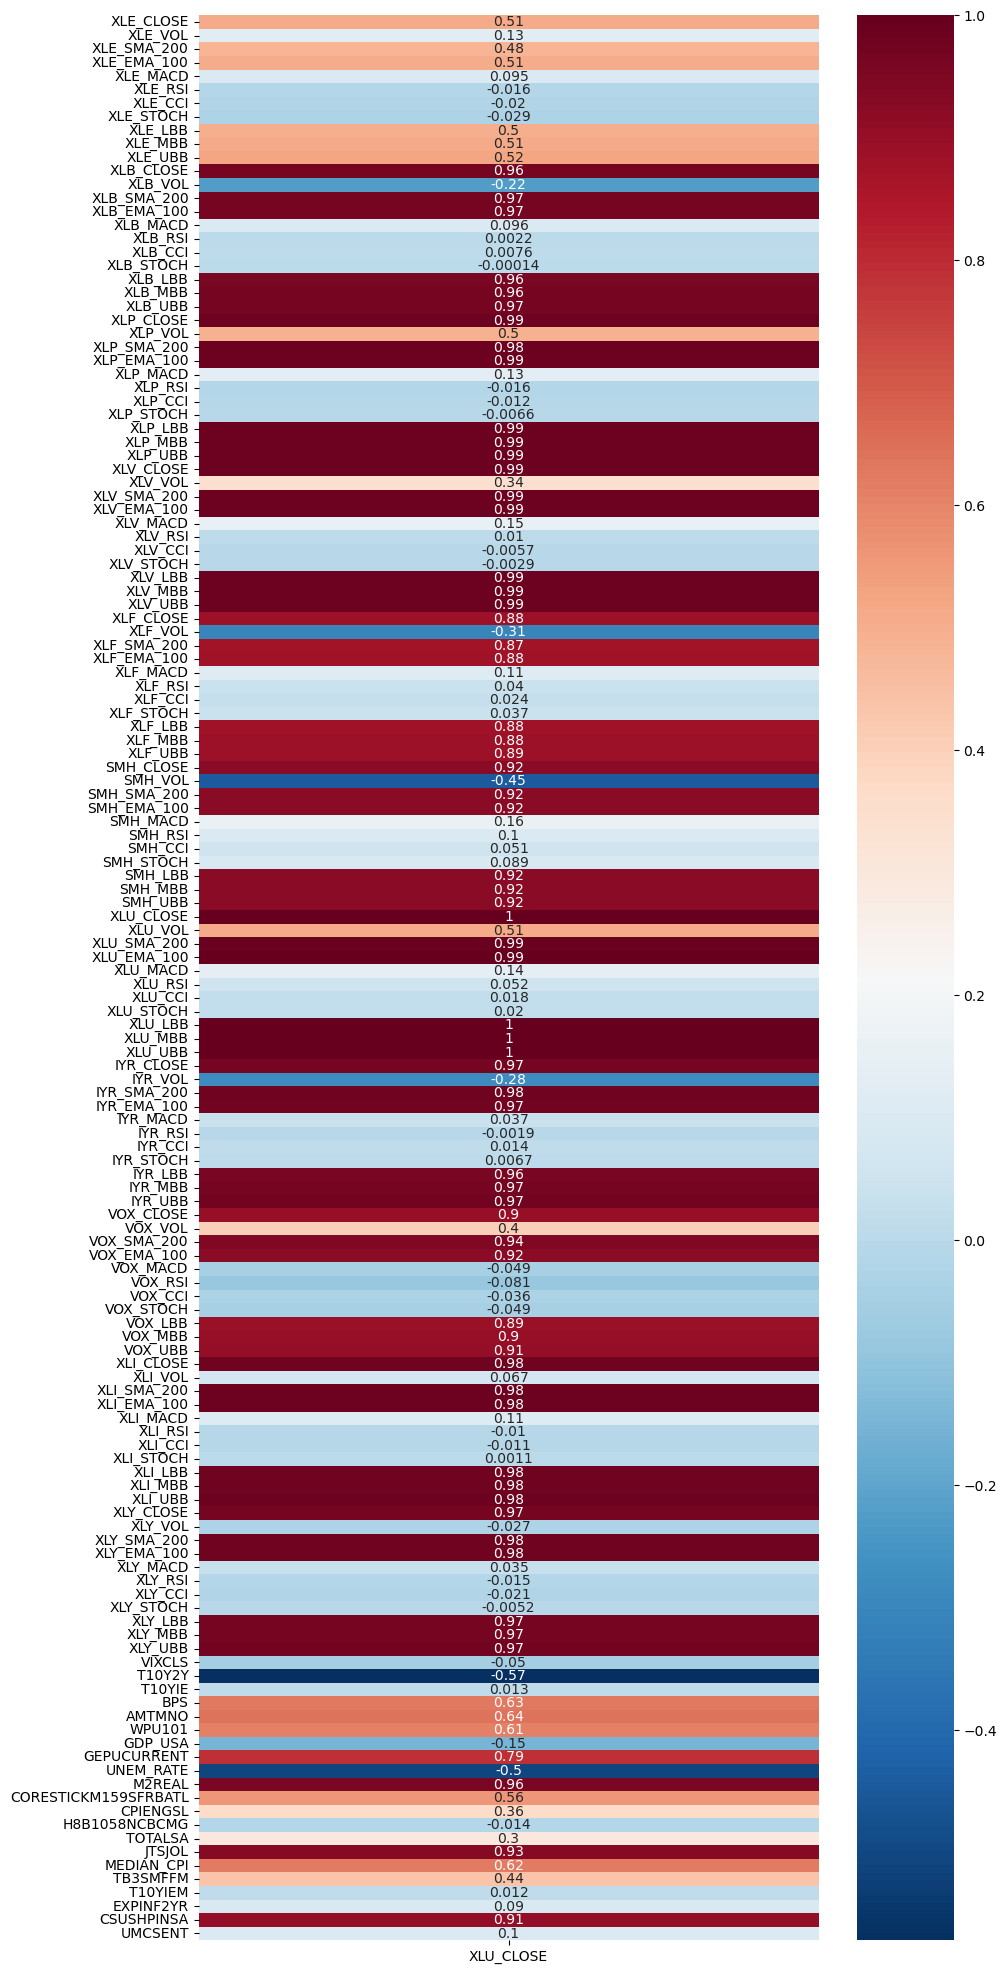

In [23]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLU_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLU_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 8. IYR Index Closing Price

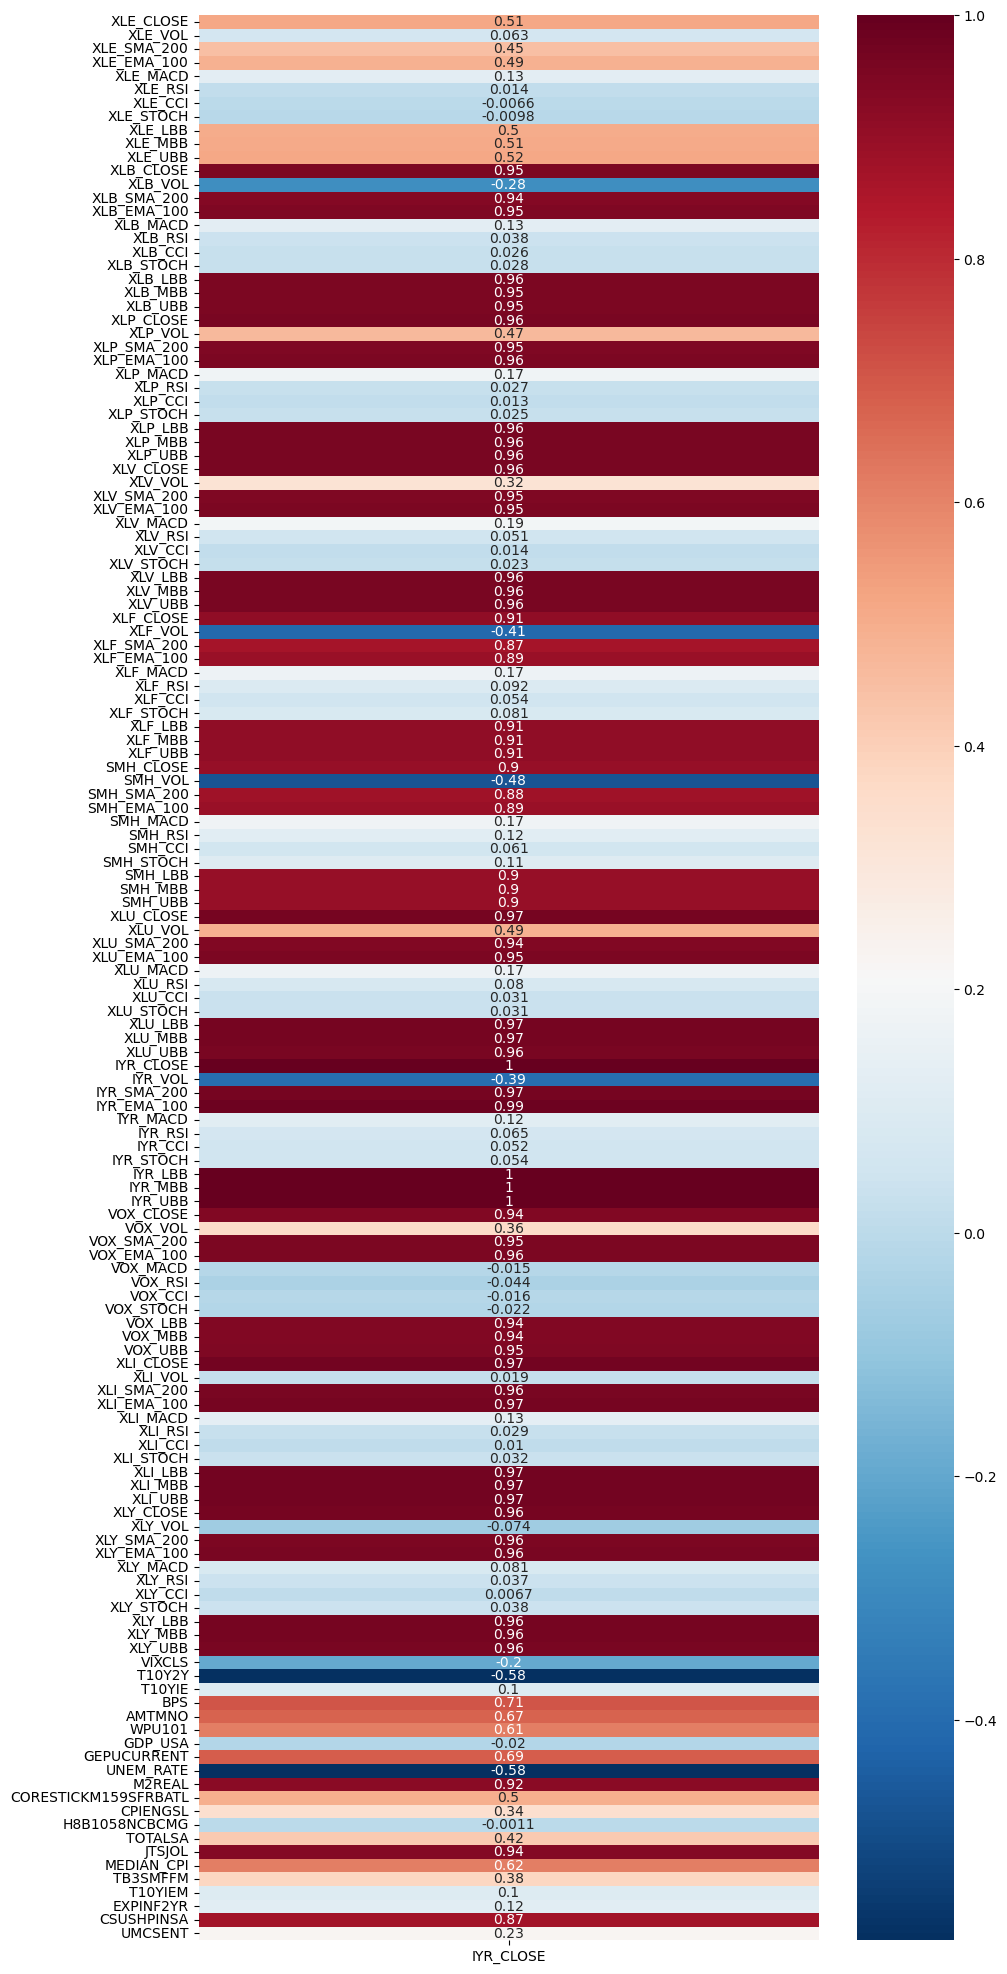

In [24]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['IYR_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['IYR_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 9. VOX Index Closing Price

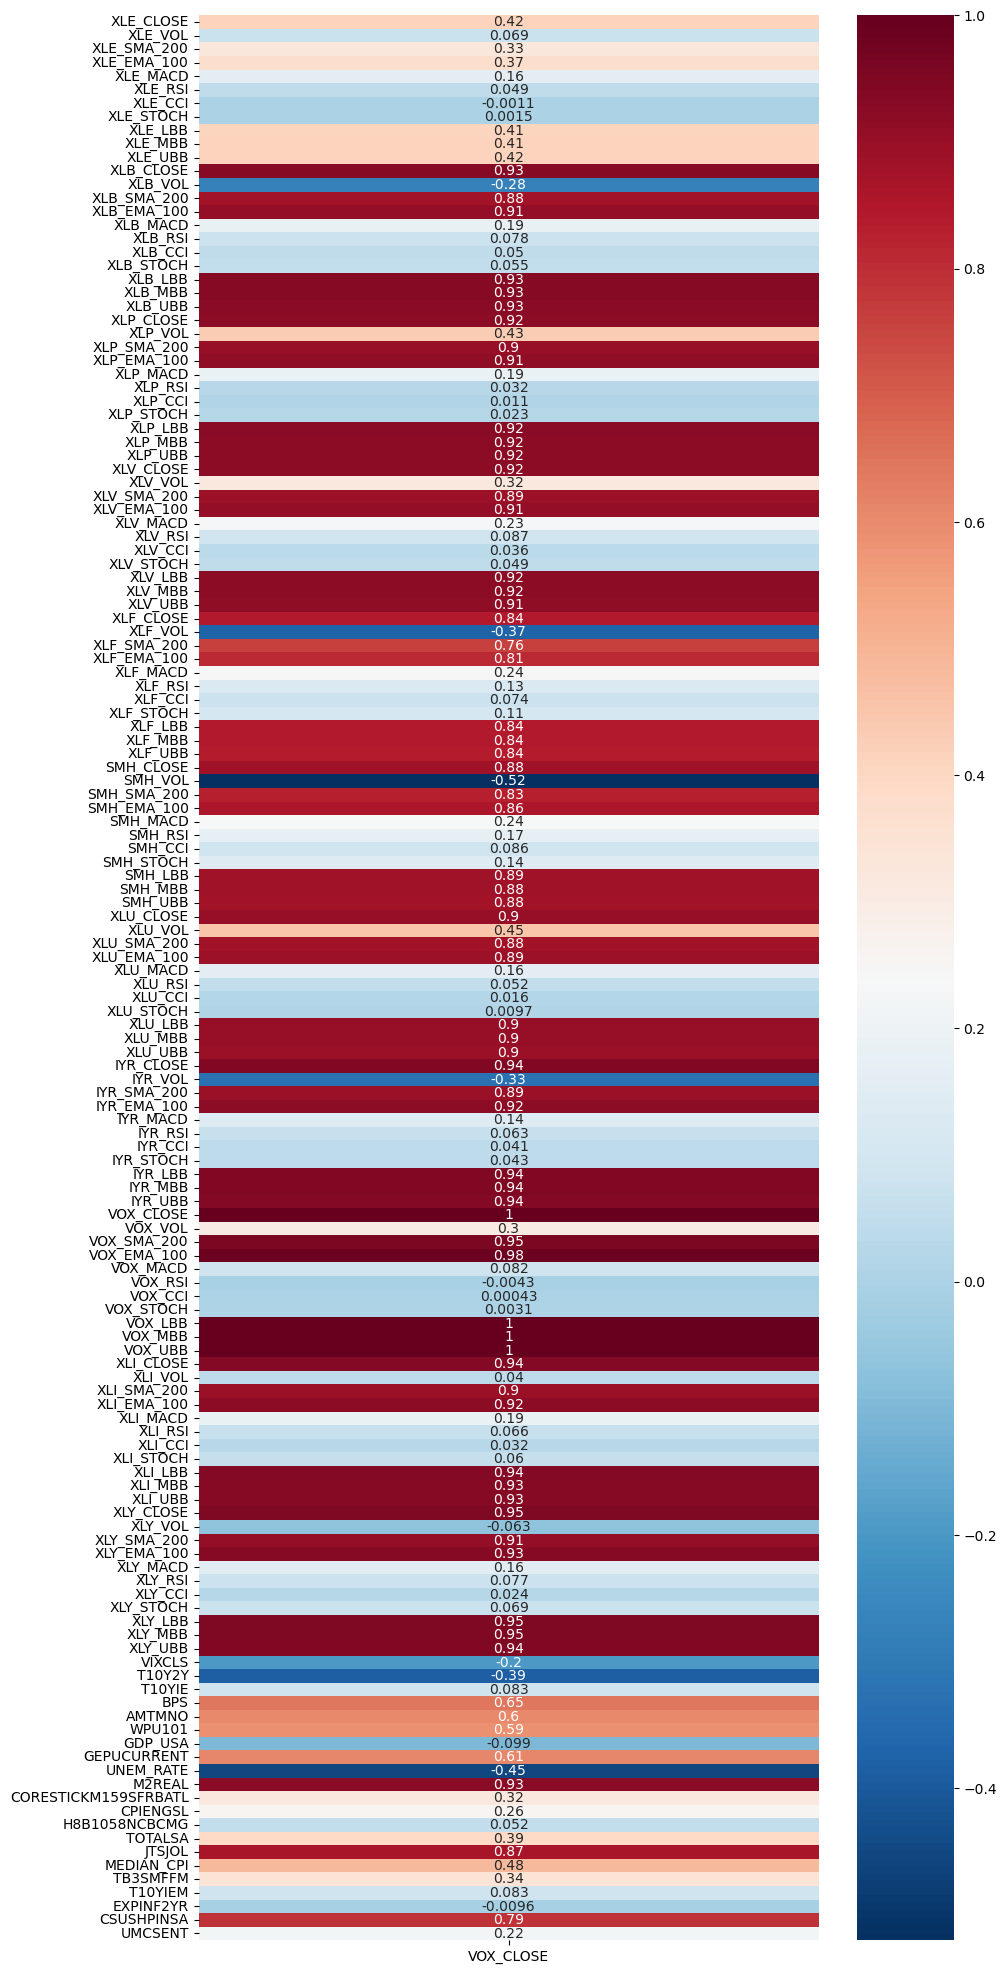

In [25]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['VOX_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['VOX_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 10. XLI Index Closing Price

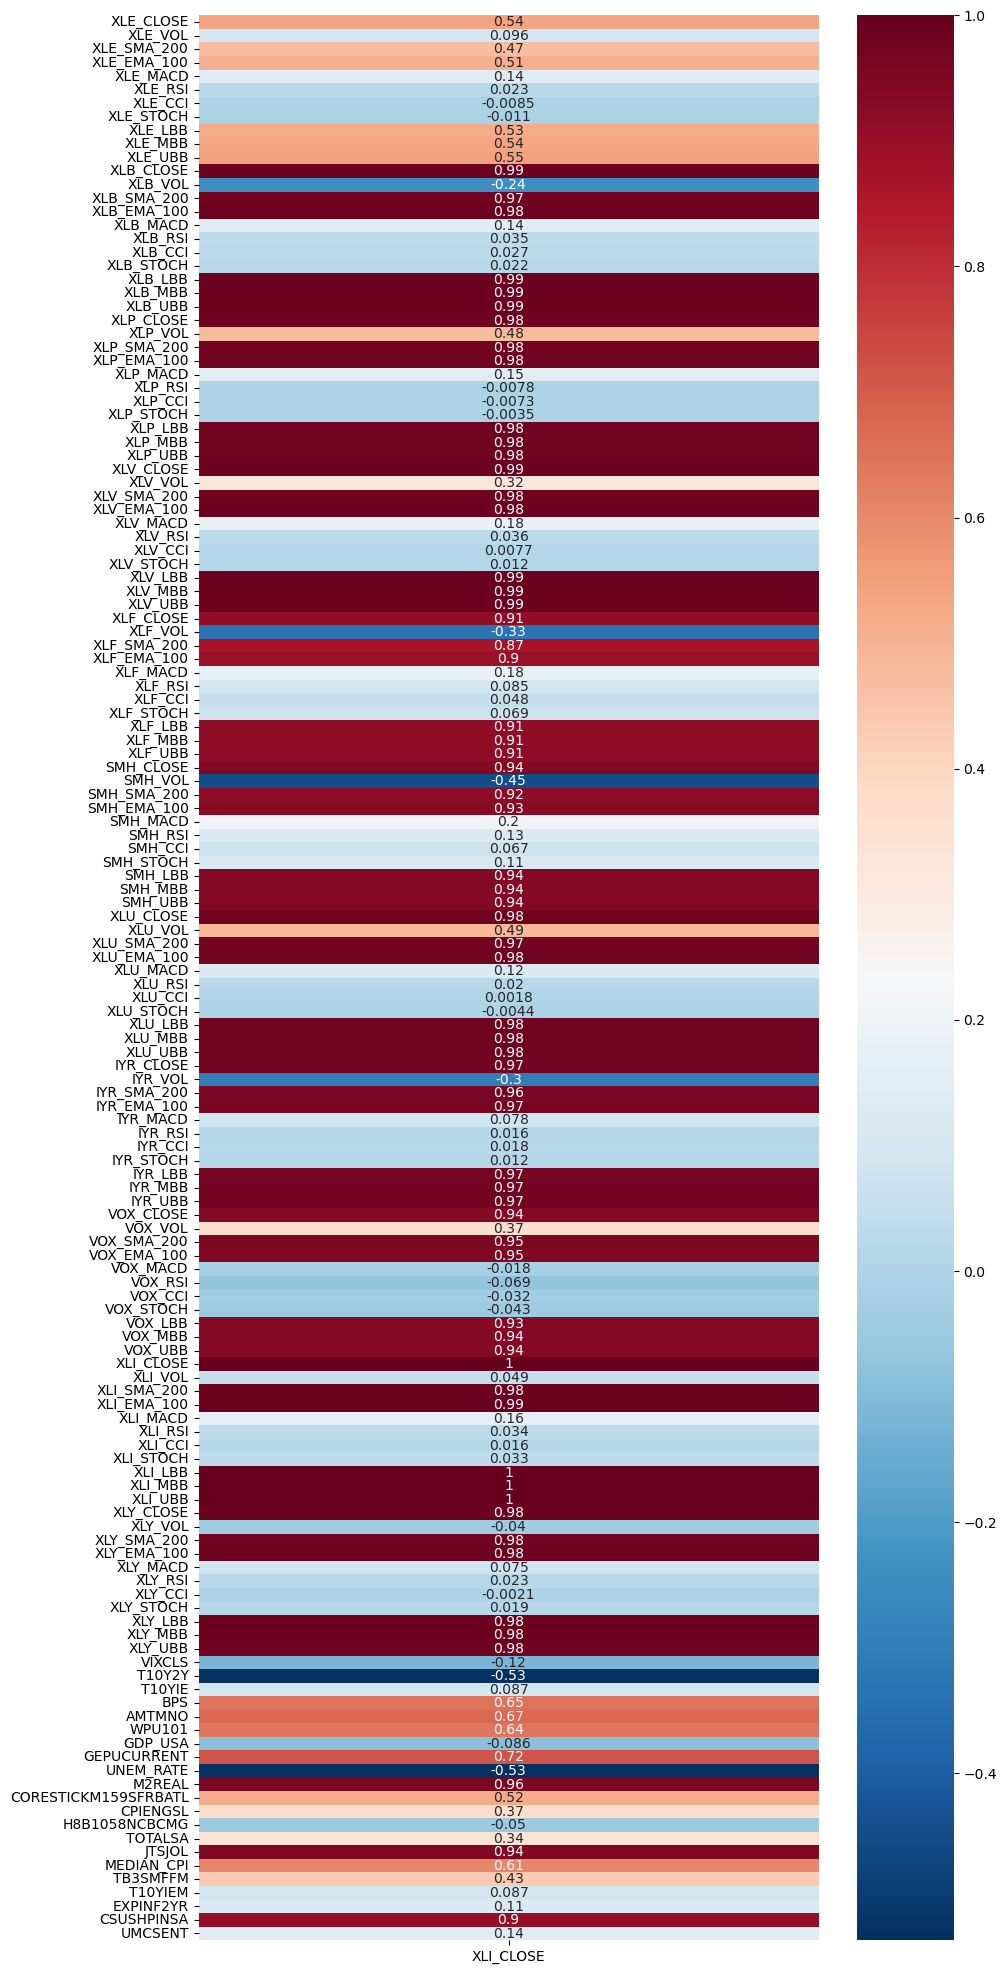

In [26]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLI_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLI_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

#### 11. XLY Index Closing Price

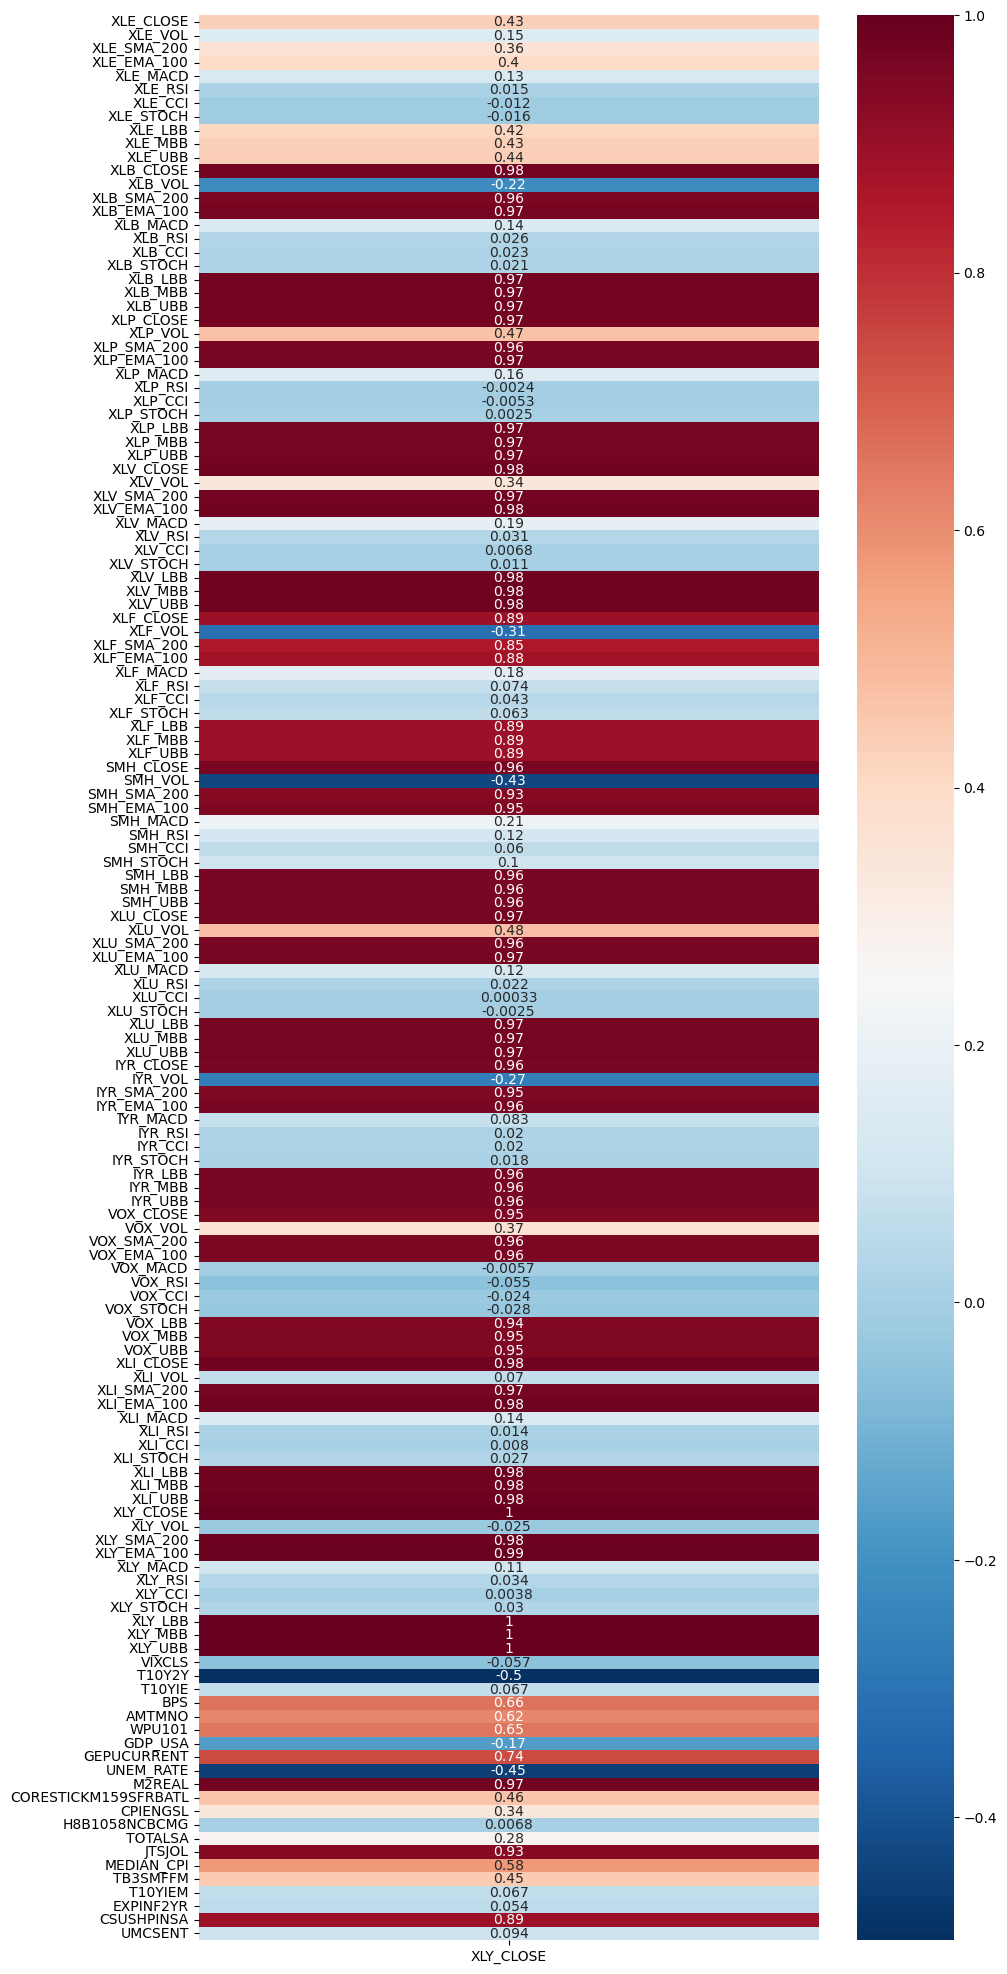

In [27]:
# heatmap visualization
plt.figure(figsize=(10,25))

sb.heatmap(pearson_cff[['XLY_CLOSE']],   
           cmap='RdBu_r',
           xticklabels=pearson_cff[['XLY_CLOSE']].columns,
           yticklabels=pearson_cff.columns,
           annot=True)

#plt.subplots_adjust(left=0.05, right=0.95)
plt.show()

## 2. SelectKBest

#### 1. XLE Index Closing Price

In [51]:
X_XLE = df.drop(columns=['XLE_CLOSE'])
y_XLE = df['XLE_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs = SelectKBest(score_func = f_regression, k=15)
X_best = fs.fit_transform(X_XLE, y_XLE)

column_names = X_XLE.columns[fs.get_support()]

# prints out k number of most relevant features
print(column_names)

Index(['XLE_SMA_200', 'XLE_EMA_100', 'XLE_LBB', 'XLE_MBB', 'XLE_UBB',
       'XLB_CLOSE', 'XLB_SMA_200', 'XLB_EMA_100', 'XLB_LBB', 'XLB_MBB',
       'XLB_UBB', 'AMTMNO', 'CORESTICKM159SFRBATL', 'CPIENGSL', 'MEDIAN_CPI'],
      dtype='object')


#### 2. XLB Index Closing Price

In [48]:
X_XLB = df.drop(columns=['XLB_CLOSE'])
y_XLB = df['XLB_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs2 = SelectKBest(score_func = f_regression, k=25)
X2_best = fs2.fit_transform(X_XLB, y_XLB)

column_names2 = X_XLB.columns[fs2.get_support()]

# prints out k number of most relevant features
print(column_names2)

Index(['XLB_SMA_200', 'XLB_EMA_100', 'XLB_LBB', 'XLB_MBB', 'XLB_UBB',
       'XLP_CLOSE', 'XLP_LBB', 'XLV_CLOSE', 'XLV_SMA_200', 'XLV_EMA_100',
       'XLV_LBB', 'XLV_MBB', 'XLV_UBB', 'XLI_CLOSE', 'XLI_SMA_200',
       'XLI_EMA_100', 'XLI_LBB', 'XLI_MBB', 'XLI_UBB', 'XLY_CLOSE',
       'XLY_SMA_200', 'XLY_EMA_100', 'XLY_LBB', 'XLY_MBB', 'XLY_UBB'],
      dtype='object')


#### 3. XLP Index Closing Price

In [38]:
X_XLP = df.drop(columns=['XLP_CLOSE'])
y_XLP = df['XLP_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs3 = SelectKBest(score_func = f_regression, k=15)
X3_best = fs3.fit_transform(X_XLP, y_XLP)

column_names3 = X_XLP.columns[fs3.get_support()]

# prints out k number of most relevant features
print(column_names3)

Index(['XLP_SMA_200', 'XLP_EMA_100', 'XLP_LBB', 'XLP_MBB', 'XLP_UBB',
       'XLV_CLOSE', 'XLV_SMA_200', 'XLV_EMA_100', 'XLV_LBB', 'XLV_MBB',
       'XLV_UBB', 'XLU_CLOSE', 'XLU_LBB', 'XLU_MBB', 'XLU_UBB'],
      dtype='object')


#### 4. XLV Index Closing Price

In [39]:
X_XLV = df.drop(columns=['XLV_CLOSE'])
y_XLV = df['XLV_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs4 = SelectKBest(score_func = f_regression, k=15)
X4_best = fs4.fit_transform(X_XLV, y_XLV)

column_names4 = X_XLV.columns[fs4.get_support()]

# prints out k number of most relevant features
print(column_names4)

Index(['XLP_CLOSE', 'XLP_SMA_200', 'XLP_EMA_100', 'XLP_LBB', 'XLP_MBB',
       'XLP_UBB', 'XLV_SMA_200', 'XLV_EMA_100', 'XLV_LBB', 'XLV_MBB',
       'XLV_UBB', 'XLI_SMA_200', 'XLI_EMA_100', 'XLI_UBB', 'XLY_SMA_200'],
      dtype='object')


#### 5. XLF Index Closing Price

In [40]:
X_XLF = df.drop(columns=['XLF_CLOSE'])
y_XLF = df['XLF_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs5 = SelectKBest(score_func = f_regression, k=15)
X5_best = fs5.fit_transform(X_XLF, y_XLF)

column_names5 = X_XLF.columns[fs5.get_support()]

# prints out k number of most relevant features
print(column_names5)

Index(['XLF_SMA_200', 'XLF_EMA_100', 'XLF_LBB', 'XLF_MBB', 'XLF_UBB',
       'IYR_CLOSE', 'IYR_MBB', 'IYR_UBB', 'XLI_CLOSE', 'XLI_EMA_100',
       'XLI_LBB', 'XLI_MBB', 'XLI_UBB', 'JTSJOL', 'CSUSHPINSA'],
      dtype='object')


#### 6. SMH Index Closing Price

In [41]:
X_SMH = df.drop(columns=['SMH_CLOSE'])
y_SMH = df['SMH_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs6 = SelectKBest(score_func = f_regression, k=15)
X6_best = fs6.fit_transform(X_SMH, y_SMH)

column_names6 = X_SMH.columns[fs6.get_support()]

# prints out k number of most relevant features
print(column_names6)

Index(['XLB_CLOSE', 'XLB_LBB', 'XLB_MBB', 'XLB_UBB', 'SMH_SMA_200',
       'SMH_EMA_100', 'SMH_LBB', 'SMH_MBB', 'SMH_UBB', 'XLY_CLOSE',
       'XLY_SMA_200', 'XLY_EMA_100', 'XLY_LBB', 'XLY_MBB', 'XLY_UBB'],
      dtype='object')


#### 7. XLU Index Closing Price

In [42]:
X_XLU = df.drop(columns=['XLU_CLOSE'])
y_XLU = df['XLU_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs7 = SelectKBest(score_func = f_regression, k=15)
X7_best = fs7.fit_transform(X_XLU, y_XLU)

column_names7 = X_XLU.columns[fs7.get_support()]

# prints out k number of most relevant features
print(column_names7)

Index(['XLP_CLOSE', 'XLP_EMA_100', 'XLP_LBB', 'XLP_MBB', 'XLP_UBB',
       'XLV_CLOSE', 'XLV_EMA_100', 'XLV_LBB', 'XLV_MBB', 'XLV_UBB',
       'XLU_SMA_200', 'XLU_EMA_100', 'XLU_LBB', 'XLU_MBB', 'XLU_UBB'],
      dtype='object')


#### 8. IYR Index Closing Price

In [43]:
X_IYR = df.drop(columns=['IYR_CLOSE'])
y_IYR = df['IYR_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs8 = SelectKBest(score_func = f_regression, k=15)
X8_best = fs8.fit_transform(X_IYR, y_IYR)

column_names8 = X_IYR.columns[fs8.get_support()]

# prints out k number of most relevant features
print(column_names8)

Index(['XLU_CLOSE', 'XLU_LBB', 'XLU_MBB', 'IYR_SMA_200', 'IYR_EMA_100',
       'IYR_LBB', 'IYR_MBB', 'IYR_UBB', 'XLI_CLOSE', 'XLI_EMA_100', 'XLI_LBB',
       'XLI_MBB', 'XLI_UBB', 'XLY_CLOSE', 'XLY_LBB'],
      dtype='object')


#### 9. VOX Index Closing Price

In [44]:
X_VOX = df.drop(columns=['VOX_CLOSE'])
y_VOX = df['VOX_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs9 = SelectKBest(score_func = f_regression, k=15)
X9_best = fs9.fit_transform(X_VOX, y_VOX)

column_names9 = X_VOX.columns[fs9.get_support()]

# prints out k number of most relevant features
print(column_names9)

Index(['IYR_CLOSE', 'IYR_LBB', 'IYR_MBB', 'IYR_UBB', 'VOX_SMA_200',
       'VOX_EMA_100', 'VOX_LBB', 'VOX_MBB', 'VOX_UBB', 'XLI_CLOSE', 'XLI_LBB',
       'XLY_CLOSE', 'XLY_LBB', 'XLY_MBB', 'XLY_UBB'],
      dtype='object')


#### 10. XLI Index Closing Price

In [45]:
X_XLI = df.drop(columns=['XLI_CLOSE'])
y_XLI = df['XLI_CLOSE']

# adjust 'k=5' to the number of features you want to see
fs10 = SelectKBest(score_func = f_regression, k=15)
X10_best = fs10.fit_transform(X_XLI, y_XLI)

column_names10 = X_XLI.columns[fs10.get_support()]

# prints out k number of most relevant features
print(column_names10)

Index(['XLB_CLOSE', 'XLB_LBB', 'XLB_MBB', 'XLB_UBB', 'XLV_CLOSE',
       'XLV_EMA_100', 'XLV_LBB', 'XLV_MBB', 'XLV_UBB', 'XLI_SMA_200',
       'XLI_EMA_100', 'XLI_LBB', 'XLI_MBB', 'XLI_UBB', 'XLY_LBB'],
      dtype='object')


#### 11. XLY Index Closing Price

In [46]:
X_XLY = df.drop(columns=['XLY_CLOSE'])
y_XLY = df['XLY_CLOSE']

fs11 = SelectKBest(score_func = f_regression, k=15)
X11_best = fs11.fit_transform(X_XLY, y_XLY)

column_names11 = X_XLY.columns[fs11.get_support()]

print(column_names11)

Index(['XLV_CLOSE', 'XLV_EMA_100', 'XLV_LBB', 'XLV_MBB', 'XLV_UBB',
       'XLI_CLOSE', 'XLI_EMA_100', 'XLI_LBB', 'XLI_MBB', 'XLI_UBB',
       'XLY_SMA_200', 'XLY_EMA_100', 'XLY_LBB', 'XLY_MBB', 'XLY_UBB'],
      dtype='object')
